In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json

In [3]:
df1 = pd.read_csv('gold_open.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df_input = df1[['High/Close', 'Low/Close', 'Spread', 'Spread Change',
       'Volume', 'Volume Diff', 'Volume change', 'Return ewm', 'Oil Close',
       'Oil Return', 'Gold Close', 'gld Return', 'CAD Close', 'Cad Return',
       'TSX Close', 'Tsx Return', 'Return']]
df_input

,High/Close,Low/Close,Spread,Spread Change,Volume,Volume Diff,Volume change,Return ewm,Oil Close,Oil Return,Gold Close,gld Return,CAD Close,Cad Return,TSX Close,Tsx Return,Return
Date,,,,,,,,,,,,,,,,,
2010-01-05,0.003296,-0.018597,0.795529,-0.031249,2996000,-74100.0,-0.024136,0.009505,81.769997,0.003190,1118.099976,0.000358,1.03950,-0.001441,11888.099609,0.001786,0.009505
2010-01-06,0.013201,-0.012737,0.958055,0.204300,2944700,-51300.0,-0.017123,0.014154,83.180000,0.017244,1135.900024,0.015920,1.03190,-0.007311,11944.500000,0.002772,0.016478
2010-01-07,0.008443,-0.006801,0.556016,-0.419641,2420100,-524600.0,-0.178151,-0.003619,82.660004,-0.006251,1133.099976,-0.002465,1.03400,0.002035,11887.500000,0.000258,-0.012506
2010-01-08,0.007721,-0.012869,0.752759,0.353845,2648000,227900.0,0.094170,0.000357,82.750000,0.001089,1138.199951,0.004501,1.02980,-0.004062,11953.799805,0.002031,0.002346
2010-01-11,0.023256,-0.006744,1.103476,0.465908,2363100,-284900.0,-0.107591,0.004175,82.519997,-0.002779,1150.699951,0.010982,1.03380,0.003884,11947.099609,0.001167,0.006083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,0.014691,-0.000334,0.449999,-0.274196,3180400,-1345000.0,-0.297211,-0.002230,52.910000,-0.005638,1853.599976,0.005806,1.27077,-0.004988,17934.699219,0.000252,0.000000
2021-01-14,0.013708,-0.005015,0.559999,0.244446,3226400,46000.0,0.014464,-0.001634,53.570000,0.012474,1850.300049,-0.001780,1.26981,-0.000755,17958.099609,0.000603,-0.001336
2021-01-15,0.023761,-0.001018,0.730000,0.303572,3259100,32700.0,0.010135,-0.010575,52.360001,-0.022587,1829.300049,-0.011350,1.26477,-0.003969,17909.000000,-0.000509,-0.015045


In [4]:
y = df1[["Pos"]]
y.head()

,Pos
Date,
2010-01-05,1
2010-01-06,0
2010-01-07,1
2010-01-08,1
2010-01-11,0


In [5]:
file_path = Path("bar_model_posneg.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

file_path = "bar_weights_posneg.h5"
loaded_model.load_weights(file_path)

In [6]:
split = int(0.7 * len(df1))

df = df1[split:]


df_test = df_input[split:]
df_test.shape

(809, 17)

In [7]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_input, y, test_size=0.3, random_state=42)

x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()


x_train_scaler.fit(x_train)
x_test_scaler.fit(x_test)


x_train = x_train_scaler.transform(x_train)
x_test = x_test_scaler.transform(df_test)

enc = OneHotEncoder()
enc.fit(y_train)

encoded_y_train = enc.transform(y_train).toarray()
encoded_y_test = enc.transform(y_test).toarray()

In [8]:
predicted = loaded_model.predict(x_test)
predicted = enc.inverse_transform(predicted).flatten().tolist()
df["tomo prediction"] = predicted

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
from sklearn.metrics import classification_report
print(classification_report(df.Pos, df["tomo prediction"]))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       405
           1       0.56      0.54      0.55       404

    accuracy                           0.56       809
   macro avg       0.56      0.56      0.56       809
weighted avg       0.56      0.56      0.56       809



In [10]:
df

,Open,High,Low,High/Close,Low/Close,Spread,Spread Change,Volume,Volume Diff,Volume change,...,gld Return,CAD Close,Cad Return,TSX Close,Tsx Return,Return,Bar Close,Day of the Week,Pos,tomo prediction
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-21,19.237635,19.632204,19.199142,0.012407,-0.009926,0.433062,-0.357145,2433700,-877800.0,-0.265076,...,-0.016311,1.23454,0.004532,15454.900391,0.004010,-0.007878,19.391613,3,1,1
2017-09-22,19.487848,19.535966,19.324247,0.005448,-0.005448,0.211719,-0.511111,1320000,-1113700.0,-0.457616,...,0.002092,1.23239,-0.001741,15454.200195,0.002658,0.001985,19.430107,4,1,1
2017-09-25,19.381985,19.766932,19.266502,0.000000,-0.025316,0.500429,1.363645,2872400,1552400.0,1.176061,...,0.010438,1.23460,0.001793,15516.200195,0.003110,0.017335,19.766932,0,0,0
2017-09-26,19.564835,19.776554,19.478223,0.013314,-0.001972,0.298332,-0.403848,2113100,-759300.0,-0.264343,...,-0.007499,1.23702,0.001960,15474.099609,0.001169,-0.012658,19.516718,1,0,1
2017-09-27,19.401234,19.516718,19.324245,0.000000,-0.009862,0.192473,-0.354835,2172500,59400.0,0.028110,...,-0.010486,1.23637,-0.000525,15609.700195,0.003700,0.000000,19.516718,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,30.120001,30.389999,29.940001,0.014691,-0.000334,0.449999,-0.274196,3180400,-1345000.0,-0.297211,...,0.005806,1.27077,-0.004988,17934.699219,0.000252,0.000000,29.950001,2,0,0
2021-01-14,29.889999,30.320000,29.760000,0.013708,-0.005015,0.559999,0.244446,3226400,46000.0,0.014464,...,-0.001780,1.26981,-0.000755,17958.099609,0.000603,-0.001336,29.910000,3,0,0
2021-01-15,30.020000,30.160000,29.430000,0.023761,-0.001018,0.730000,0.303572,3259100,32700.0,0.010135,...,-0.011350,1.26477,-0.003969,17909.000000,-0.000509,-0.015045,29.459999,4,1,0


In [11]:
df = df[["Open", "tomo prediction"]]
df["Pos"] = df1["Pos"]
df["prediction"] = df["tomo prediction"].shift(1)
df["last"] = df["prediction"].shift(1)
df = df.dropna()
back_csv_data = df.to_csv('Barrick_backtest.csv', index = True) 

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [12]:
df

,Open,tomo prediction,Pos,prediction,last
Date,,,,,
2017-09-25,19.381985,0,0,1.0,1.0
2017-09-26,19.564835,1,0,0.0,1.0
2017-09-27,19.401234,1,0,1.0,0.0
2017-09-28,19.535967,0,0,1.0,1.0
2017-09-29,19.430104,1,1,0.0,1.0
...,...,...,...,...,...
2021-01-13,30.120001,0,0,0.0,0.0
2021-01-14,29.889999,0,0,0.0,0.0
2021-01-15,30.020000,0,1,0.0,0.0


In [13]:
import math
capital = float(100)
pos = float(1)
neg = float(0)

def Backtest(capital, split, year):
    initial_capital = capital
    df1 = df.loc[year:]
    shares = math.floor((initial_capital/df1.iat[0,0]) * split)
    hold_shares = math.floor(initial_capital/df1.iat[0,0]) - shares
    capital = capital - ((df1.iat[0,0] * shares) + (df1.iat[0,0] * hold_shares))
    bnh_shares = math.floor(initial_capital/df1.iat[0,0])
    newshares = shares
    port = shares
    sells = 0
    buys = shares + hold_shares
    tradelist = []
        
    if split > 1:
        return "Split Invalid, Please Choose a number between 0 and 1 to determine how the % of your portfolio to be actively traded."
    
    elif year < "2017":
        return "We can only backtest back to 2017"
    
    elif capital < 0:
        return "Not Enough Starting Capital"
    
    else:
        for i, row in df1.iterrows():
            if row['prediction'] == 1.0 and row['last'] == 0.0:
                if capital > (row['Open'] * shares):
                    capital = capital - (row['Open'] * shares)
                    port = port + shares
                    buys = buys + shares
                    tradelist.append((row["Open"] * port) + (row["Open"] * hold_shares) + capital)
                else: 
                    tradelist.append((row["Open"] * port) + (row["Open"] * hold_shares) + capital)
        
            elif row['prediction'] == 0.0 and row['last'] == 1.0:
                if port >= shares:
                    capital = capital + (row['Open'] * shares)
                    port = port - shares
                    sells = sells + shares
                    tradelist.append((row["Open"] * port) + (row["Open"] * hold_shares) + capital)
                elif port == 0:
                    tradelist.append((row["Open"] * port) + (row["Open"] * hold_shares) + capital)
                else:
                    while port < newshares:
                        if port < newshares:
                            newshares = newshares - 1
                        elif port >= newshares:
                            capital = capital + (row['Open'] * newshares)
                            port = port - newshares
                            sells = sells + newshares
                            newshares = shares
                            tradelist.append((row["Open"] * port) + (row["Open"] * hold_shares) + capital)
                            break
            else:
                tradelist.append((row["Open"] * port) + (row["Open"] * hold_shares) + capital)
            
        tport = round(capital + (port * df1.iat[-1,0]) + (hold_shares * df1.iat[-1,0]),2)
                
        df1["port"] = tradelist
        df1["Open2"] = df1["Open"] * bnh_shares
        
        df1.plot(y=["port", "Open2"], kind="line")
        plt.legend(["Our Strategy", "Buy and Hold Strategy"])
                
        treturn = round(((tport - initial_capital)/initial_capital) * 100, 2)
        shop = round(((df1.iat[-1,0] - df1.iat[0,0])/df1.iat[0,0]) * 100, 2)
        bnh_leftover = initial_capital - (df1.iat[0,0] * bnh_shares)
        bnh = round(((df1.iat[-1,0] * bnh_shares) + bnh_leftover),2)
        bnh_per = round(((bnh - (initial_capital))/initial_capital)*100, 2)
        print(f"Your Total Return is {treturn}%")
        print("")
        print(f"Total Portfolio Value is ${tport}")
        print("")
        print(f"Portfolio Breakdown")
        print(f"Avail. Funds: ${round(capital,2)}")
        print(f"Shares Value: ${round((tport-capital),2)}")
        print("")
        print(f"Barricks return is {shop}%")
        print("-------------------------------------------")
        print(f"                        Return     Total")
        print(f"Our Strategy:            {treturn}%      {tport}")
        print(f"Buy and Hold Strategy:   {bnh_per}%      {bnh}")
        print(f"")
        print(f"-------------------------------------------")
        print(f"Buy Orders: {buys}")
        print(f"Sell Orders: {sells}")
        print(f"Total Trades: {buys+sells}")

C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Your Total Return is 51.09%

Total Portfolio Value is $15108.67

Portfolio Breakdown
Avail. Funds: $1872.82
Shares Value: $13235.85

Barricks return is 65.41%
-------------------------------------------
                        Return     Total
Our Strategy:            51.09%      15108.67
Buy and Hold Strategy:   65.33%      16533.38

-------------------------------------------
Buy Orders: 1856
Sell Orders: 1417
Total Trades: 3273


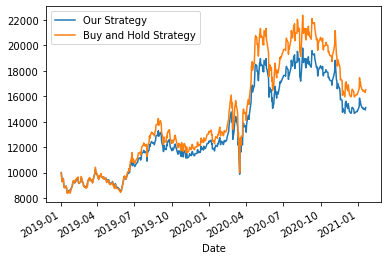

In [26]:
Backtest(10000,.20,'2019')